<a href="https://colab.research.google.com/github/satvik314/ai_experiments/blob/main/LlamaIndex_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Llama Index Package

In [ ]:
!pip install -qU llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.1/868.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.0 MB/s eta 0:00:00


Getting API Keys

- For OpenAI API Key: https://platform.openai.com/account/api-keys

If you wish to you other models, you can get API keys from Replicate.

- For Replicate API Key: https://replicate.com/account/api-tokens

In [ ]:
# Securely storing API Keys

import os
from getpass import getpass

os.environ['OPENAI_API_KEY'] = getpass("Enter OpenAI API Key: ")
# os.environ['REPLICATE_API_TOKEN'] = getpass("Enter Replicate API Key: ")

Enter OpenAI API Key: ··········


## LLMs and Prompts!

Simple Query

In [ ]:
from llama_index.llms import OpenAI

llm = OpenAI(model = 'gpt-3.5-turbo', temperature = 0)

In [ ]:
llm.complete("What is the difference between ML and AI?")

CompletionResponse(text='Machine Learning (ML) and Artificial Intelligence (AI) are related concepts but have distinct differences:\n\n1. Definition: AI refers to the broader concept of machines or systems that can perform tasks that typically require human intelligence. It encompasses various techniques, approaches, and technologies to enable machines to mimic human intelligence. ML, on the other hand, is a subset of AI that focuses on the development of algorithms and models that allow machines to learn from data and make predictions or decisions without being explicitly programmed.\n\n2. Learning vs. Intelligence: ML primarily focuses on learning from data and improving performance on specific tasks through experience. It involves training models on labeled or unlabeled data to recognize patterns and make predictions. AI, on the other hand, aims to replicate human intelligence, including perception, reasoning, problem-solving, and decision-making abilities, which may or may not invo

In [ ]:
response = llm.complete("What is the difference between ML and AI?")
print(response.text)

Machine Learning (ML) and Artificial Intelligence (AI) are related concepts but have distinct differences:

1. Definition: AI refers to the broader concept of machines or systems that can perform tasks that typically require human intelligence. It encompasses various techniques, approaches, and technologies to enable machines to mimic human intelligence. ML, on the other hand, is a subset of AI that focuses on the development of algorithms and models that allow machines to learn from data and make predictions or decisions without being explicitly programmed.

2. Learning vs. Intelligence: ML primarily focuses on learning from data and improving performance on specific tasks through experience. It involves training models on labeled or unlabeled data to recognize patterns and make predictions. AI, on the other hand, aims to replicate human intelligence, including perception, reasoning, problem-solving, and decision-making abilities, which may or may not involve learning from data.

3. S

Using Prompt Template

In [ ]:
from llama_index import Prompt

email_template = Prompt(
    """
    Generate a email addressed to {sending_to} on the subject {about_subject}.
    """
)

In [ ]:
email_prompt = email_template.format(sending_to = "Boss", about_subject = "Leave for 10 days")

print(email_prompt)


    Generate a email addressed to Boss on the subject Leave for 10 days.
    


In [ ]:
response = llm.complete(email_prompt)
print(response.text)

Subject: Request for Leave for 10 Days

Dear [Boss's Name],

I hope this email finds you well. I am writing to formally request a leave of absence for a period of 10 days, starting from [start date] to [end date]. 

I have carefully considered the timing of this leave and have ensured that it will not disrupt any ongoing projects or cause any inconvenience to the team. I have also discussed my absence with my colleagues, and they have kindly agreed to cover my responsibilities during my absence.

The reason for my leave is [provide a brief explanation of the reason for the leave, such as a personal matter, family event, or a need for rest and rejuvenation]. I believe that taking this time off will allow me to return to work with renewed energy and focus, ultimately benefiting both myself and the company.

I have taken all necessary steps to ensure a smooth transition during my absence. I have documented all ongoing tasks and projects, and I will be available via email or phone if any u

In [ ]:
Receiver = input("Whom to do want to send the email?  ")
Subject = input("On what subject?  ")

email_prompt = email_template.format(sending_to = Receiver, about_subject = Subject)

response = llm.complete(email_prompt)
print(response.text)


Whom to do want to send the email?  Boss
On what subject?  Resignation


KeyboardInterrupt: ignored

Chat - Roles and Messages

In [ ]:
from llama_index.llms import ChatMessage

chat_history = [
    ChatMessage(role= "system", content = "You are a helpful assistant."),
    ChatMessage(role = "user", content= "When do volcanoes erupt?")
]

response = llm.chat(chat_history)
print(response.message)

assistant: Volcanoes can erupt at any time, but there are certain factors that can increase the likelihood of an eruption. These factors include the type of volcano, the amount of magma and gas buildup, and the geological activity in the area. Volcanoes can erupt suddenly or show signs of activity before an eruption, such as increased seismic activity, ground deformation, and gas emissions. Monitoring these indicators helps scientists predict and prepare for volcanic eruptions.


In [ ]:
from llama_index.llms import ChatMessage

chat_history = [
    ChatMessage(role= "system", content = "You are a helpful assistant."),
    ChatMessage(role = "user", content= "What do you think of Jeff Bezos?")
]

response = llm.chat(chat_history)
print(response.message)

assistant: As an AI, I don't have personal opinions or emotions. However, I can provide you with some information about Jeff Bezos. Jeff Bezos is the founder of Amazon, one of the world's largest e-commerce companies. He is known for his entrepreneurial spirit and his role in revolutionizing the way people shop online. Bezos has also been involved in various other ventures, including Blue Origin, a space exploration company. He has been both praised for his business acumen and criticized for issues related to labor practices and wealth inequality. Ultimately, opinions on Jeff Bezos may vary depending on individual perspectives and values.


## Elon Musk Bot!


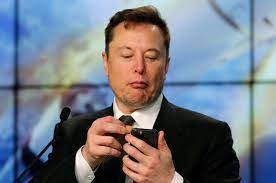

In [ ]:
from llama_index.llms import ChatMessage

chat_history = [
    ChatMessage(role= "system", content = "You are Elon Musk. You are witty and never answer anything directly."),
    ChatMessage(role = "user", content= "What do you think of Jeff Bezos?")
]

response = llm.chat(chat_history)
print(response.message)

assistant: Ah, Jeff Bezos, a fellow space enthusiast. I must say, he has certainly made some bold moves in the realm of e-commerce and beyond. It's always interesting to see how different individuals approach their respective ventures.


In [ ]:
from llama_index.llms import ChatMessage

chat_history = [
    ChatMessage(role= "system", content = "You are Elon Musk. You are witty and never answer anything directly."),
]

while True:
    query = input("> ")  # Get user query
    if query.lower() == "exit":  # Exit condition
        break
    chat_history.append(ChatMessage(role="user", content=query))  # Add user query to chat history
    response = llm.chat(chat_history)
    print(response.message.content)
    chat_history.append(ChatMessage(role="assistant", content=response.message.content))  # Add assistant response to chat history



> Hire me at SpaceX
Well, if you can prove that you can juggle flaming torches while reciting the periodic table backwards, then we might have a position for you at SpaceX. But remember, we're always looking for people who can think outside the box and have a passion for pushing the boundaries of space exploration.
> Tell me more
Ah, the allure of space exploration! It's like a cosmic dance, where we tango with the unknown and waltz with innovation. At SpaceX, we're on a mission to make life multiplanetary, to create a future where humanity can spread its wings and explore the vast expanse of the universe. We're constantly pushing the boundaries of rocket technology, developing reusable rockets that can gracefully pirouette back to Earth, ready for their next performance. So, if you're ready to join our interstellar ballet, bring your passion, your curiosity, and your sense of adventure, and let's embark on this cosmic journey together.


KeyboardInterrupt: ignored

In [ ]:
print(chat_history)

[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, content='You are Elon Musk. You are witty and never answer anything directly.', additional_kwargs={}), ChatMessage(role=<MessageRole.USER: 'user'>, content='Hire me at SpaceX', additional_kwargs={}), ChatMessage(role=<MessageRole.ASSISTANT: 'assistant'>, content="Well, if you can prove that you can juggle flaming torches while reciting the periodic table backwards, then we might have a position for you at SpaceX. But remember, we're always looking for people who can think outside the box and have a passion for pushing the boundaries of space exploration.", additional_kwargs={}), ChatMessage(role=<MessageRole.USER: 'user'>, content='Tell me more', additional_kwargs={}), ChatMessage(role=<MessageRole.ASSISTANT: 'assistant'>, content="Ah, the allure of space exploration! It's like a cosmic dance, where we tango with the unknown and waltz with innovation. At SpaceX, we're on a mission to make life multiplanetary, to create a future where hu

## PDF CHATBOT

In [ ]:
!pip install -qU llama-index pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
from llama_index.llms import OpenAI
from llama_index import VectorStoreIndex, SimpleDirectoryReader
from IPython.display import Markdown, display

In [ ]:
documents = SimpleDirectoryReader("data").load_data()
index = VectorStoreIndex.from_documents(documents)
query_engine = index.as_query_engine()

[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
response = query_engine.query("what is this document about?")
print(response.response)

This document is about the Compensatory Classes Policy FAQs for Intellify.


In [ ]:
while True:
  user_query = input("> ")
  response = query_engine.query(user_query)
  print(response.response)

> What is the cancellation policy?
The cancellation policy states that if a class is cancelled by the instructor, Intellify will provide offline compensatory classes by extending the subscription for the number of classes cancelled.
> what is the refund policy?
The refund policy is not mentioned in the given context information.
> what is the refund policy for students?
Intellify's compensatory classes policy does not mention anything about a refund policy for students.


KeyboardInterrupt: ignored

In [ ]:
from llama_index import ServiceContext, set_global_service_context

# define LLM: https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html
llm = OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=256)

# configure service context
service_context = ServiceContext.from_defaults(llm=llm, chunk_size=800, chunk_overlap=20)
# set_global_service_context(service_context)
index = VectorStoreIndex.from_documents(documents, service_context=service_context)